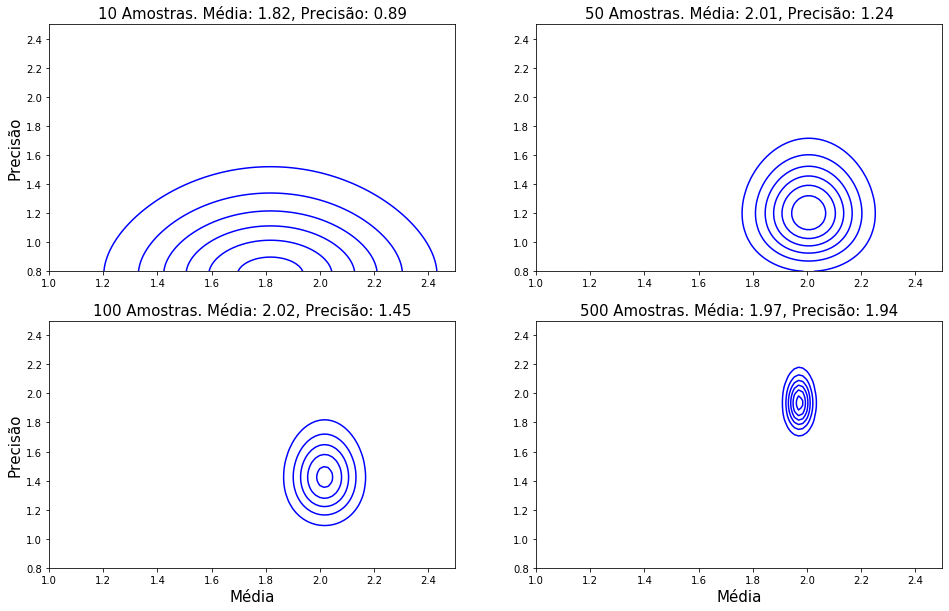

In [1]:
import pandas as pd
import numpy as np

# Dataset
X = np.matrix(pd.read_csv('gaussian_1d.csv', header = None).values)

np.mean(X.T), np.cov(X.T)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [16, 10])
Ns = [10, 50, 100, 500]
for it in range(len(Ns)):

    # Escolha de Hiperparâmetros
    N = Ns[it]
    mi0 = 1.9
    k0 = 1
    a0 = 2
    b0 = 4

    # Valores ótimos para miN, aN
    miN = (k0*mi0 + X[0:N, :].sum())/(k0 + N)
    aN = a0 + (N+1)/2

    # Parâmetros Variacionais
    kN = 2
    bN = 2

    # Iterações do modelo
    for i in range(1000):
        k_ = (k0 + N)*aN/bN
        b_ = b0 + k0/2*(1/kN + (miN - mi0) ** 2) + 1/2*(1/kN + np.power(X[0:N, :] - miN, 2)).sum()
        kN = k_; bN = b_;

    gmm = st.gamma(aN, scale = 1/bN)
    norm = st.norm

    # create a grid of (x,y) coordinates at which to evaluate the kernels
    xx, yy = np.mgrid[1:2.5:100j, 0.8:2.5:100j]
    xxyy = np.c_[xx.ravel(), yy.ravel()]

    z = np.multiply(norm.pdf((xxyy[:, 0] - miN)/(1/kN**(1/2))), gmm.pdf(xxyy[:, 1]))
    ax[it // 2, it % 2].contour(xx, yy, z.reshape((100,100)), colors='blue');
    ax[it // 2, it % 2].set_title(f'{N:d} Amostras. Média: {miN:.2f}, Precisão: {aN/bN:.2f}', fontsize = 15)

ax[0,0].set_ylabel(f'Precisão', fontsize = 15)
ax[1,0].set_ylabel(f'Precisão', fontsize = 15)
ax[1,0].set_xlabel(f'Média', fontsize = 15)
ax[1,1].set_xlabel(f'Média', fontsize = 15)

fig.savefig(f'output/{N}_amostras.png')